<a href="https://colab.research.google.com/github/naveenlankipalli/ANN_project/blob/main/Airline_Passenger_Customer_Satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [3]:
!pip install scikit-learn==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
%matplotlib inline

# Importing Dataset

In [5]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# Exploratory Data Analysis (EDA)

In [6]:
print('Shape of train data: ', train.shape)
print('Shape of test data: ', test.shape)

Shape of train data:  (103904, 25)
Shape of test data:  (25976, 25)


In [7]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
#dropping columns Unnamed:0 and id as they don't add any value
train.drop(columns = ['Unnamed: 0', 'id'], inplace = True)
test.drop(columns = ['Unnamed: 0', 'id'], inplace = True)

### Handling Missing Data

In [9]:
train.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [10]:
test.isna().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

In [11]:
#dropping rows with missing values
train.dropna(inplace = True)
test.dropna(inplace = True)

In [12]:
print('Shape of train data after dropping rows with missing values: ', train.shape)
print('Shape of test data after dropping rows with missing values: ', test.shape)

Shape of train data after dropping rows with missing values:  (103594, 23)
Shape of test data after dropping rows with missing values:  (25893, 23)


### Numerical Features

In [13]:
numerical_columns_train = train.select_dtypes(exclude=['object']).columns.tolist()
numerical_columns_test = test.select_dtypes(exclude=['object']).columns.tolist()

In [14]:
train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Categorical Features

In [15]:
categorical_columns_train = train.select_dtypes(include=['object']).columns.tolist()
categorical_columns_test = test.select_dtypes(include=['object']).columns.tolist()

In [16]:
categorical_columns_train.pop()
categorical_columns_test.pop()

'satisfaction'

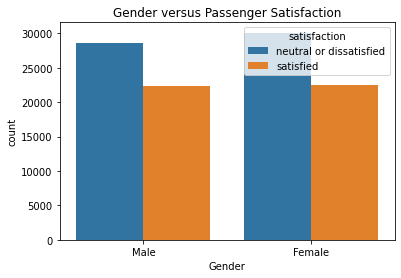

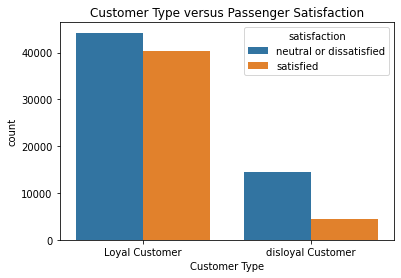

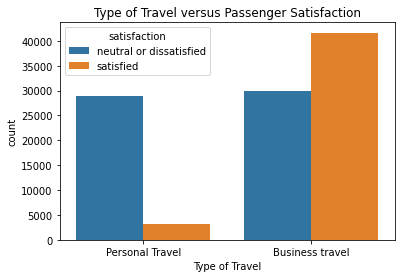

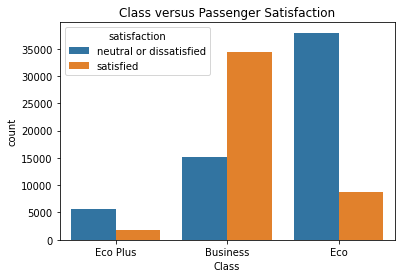

In [17]:
for col in categorical_columns_train:
    plt.figure()
    sns.countplot(data = train, x = col, hue = 'satisfaction').set_title(col + ' versus Passenger Satisfaction')

### Target Variable

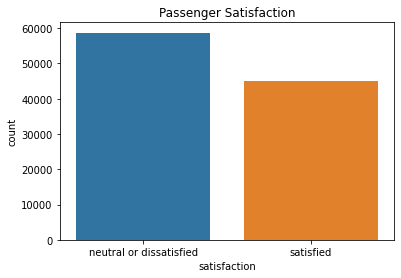

In [18]:
sns.countplot(data = train, x = 'satisfaction').set_title('Passenger Satisfaction');

# Data Preprocessing

In [19]:
#transformer pipeline
transformer_train = ColumnTransformer(transformers = [
    ('scaler', MinMaxScaler(), numerical_columns_train),
    ('encoder', OrdinalEncoder(), categorical_columns_train),
    ],
    remainder = 'passthrough'
)
transformer_train.set_output(transform = 'pandas')
train_df = transformer_train.fit_transform(train)

In [20]:
train_df

,scaler__Age,scaler__Flight Distance,scaler__Inflight wifi service,scaler__Departure/Arrival time convenient,scaler__Ease of Online booking,scaler__Gate location,scaler__Food and drink,scaler__Online boarding,scaler__Seat comfort,scaler__Inflight entertainment,...,scaler__Checkin service,scaler__Inflight service,scaler__Cleanliness,scaler__Departure Delay in Minutes,scaler__Arrival Delay in Minutes,encoder__Gender,encoder__Customer Type,encoder__Type of Travel,encoder__Class,remainder__satisfaction
0,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,...,0.8,1.0,1.0,0.015704,0.011364,1.0,0.0,1.0,2.0,neutral or dissatisfied
1,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,...,0.2,0.8,0.2,0.000628,0.003788,1.0,1.0,0.0,0.0,neutral or dissatisfied
2,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,...,0.8,0.8,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,satisfied
3,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,...,0.2,0.8,0.4,0.006910,0.005682,0.0,0.0,0.0,0.0,neutral or dissatisfied
4,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,...,0.6,0.6,0.6,0.000000,0.000000,1.0,0.0,0.0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0.205128,0.032512,0.4,0.2,0.4,0.6,0.4,0.4,0.4,0.4,...,0.4,0.6,0.4,0.001884,0.000000,0.0,1.0,0.0,1.0,neutral or dissatisfied
103900,0.538462,0.467690,0.8,0.8,0.8,0.8,0.4,0.8,1.0,1.0,...,1.0,1.0,0.8,0.000000,0.000000,1.0,0.0,0.0,0.0,satisfied
103901,0.294872,0.396607,0.2,0.2,0.2,0.6,0.8,0.2,1.0,0.8,...,1.0,1.0,0.8,0.004397,0.008838,1.0,1.0,0.0,0.0,neutral or dissatisfied
103902,0.192308,0.195679,0.2,0.2,0.2,1.0,0.2,0.2,0.2,0.2,...,1.0,0.8,0.2,0.000000,0.000000,0.0,1.0,0.0,1.0,neutral or dissatisfied


In [21]:
le = LabelEncoder()
train_df['remainder__satisfaction'] = le.fit_transform(train_df['remainder__satisfaction'])
train_df

,scaler__Age,scaler__Flight Distance,scaler__Inflight wifi service,scaler__Departure/Arrival time convenient,scaler__Ease of Online booking,scaler__Gate location,scaler__Food and drink,scaler__Online boarding,scaler__Seat comfort,scaler__Inflight entertainment,...,scaler__Checkin service,scaler__Inflight service,scaler__Cleanliness,scaler__Departure Delay in Minutes,scaler__Arrival Delay in Minutes,encoder__Gender,encoder__Customer Type,encoder__Type of Travel,encoder__Class,remainder__satisfaction
0,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,...,0.8,1.0,1.0,0.015704,0.011364,1.0,0.0,1.0,2.0,0
1,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,...,0.2,0.8,0.2,0.000628,0.003788,1.0,1.0,0.0,0.0,0
2,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,...,0.8,0.8,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1
3,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,...,0.2,0.8,0.4,0.006910,0.005682,0.0,0.0,0.0,0.0,0
4,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,...,0.6,0.6,0.6,0.000000,0.000000,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0.205128,0.032512,0.4,0.2,0.4,0.6,0.4,0.4,0.4,0.4,...,0.4,0.6,0.4,0.001884,0.000000,0.0,1.0,0.0,1.0,0
103900,0.538462,0.467690,0.8,0.8,0.8,0.8,0.4,0.8,1.0,1.0,...,1.0,1.0,0.8,0.000000,0.000000,1.0,0.0,0.0,0.0,1
103901,0.294872,0.396607,0.2,0.2,0.2,0.6,0.8,0.2,1.0,0.8,...,1.0,1.0,0.8,0.004397,0.008838,1.0,1.0,0.0,0.0,0
103902,0.192308,0.195679,0.2,0.2,0.2,1.0,0.2,0.2,0.2,0.2,...,1.0,0.8,0.2,0.000000,0.000000,0.0,1.0,0.0,1.0,0


In [22]:
#transformer pipeline
transformer_test = ColumnTransformer(transformers = [
    ('scaler', MinMaxScaler(), numerical_columns_test),
    ('encoder', OrdinalEncoder(), categorical_columns_test),
    ],
    remainder = 'passthrough'
)
transformer_test.set_output(transform = 'pandas')
test_df = transformer_test.fit_transform(test)

In [23]:
test_df

,scaler__Age,scaler__Flight Distance,scaler__Inflight wifi service,scaler__Departure/Arrival time convenient,scaler__Ease of Online booking,scaler__Gate location,scaler__Food and drink,scaler__Online boarding,scaler__Seat comfort,scaler__Inflight entertainment,...,scaler__Checkin service,scaler__Inflight service,scaler__Cleanliness,scaler__Departure Delay in Minutes,scaler__Arrival Delay in Minutes,encoder__Gender,encoder__Customer Type,encoder__Type of Travel,encoder__Class,remainder__satisfaction
0,0.576923,0.026050,1.0,0.8,0.6,0.75,0.6,0.8,0.50,1.0,...,0.25,1.0,1.0,0.044326,0.039462,0.0,0.0,0.0,1.0,satisfied
1,0.371795,0.571890,0.2,0.2,0.6,0.00,1.0,0.8,1.00,0.8,...,0.50,0.8,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,satisfied
2,0.166667,0.032512,0.4,0.0,0.4,0.75,0.4,0.4,0.25,0.4,...,0.25,0.4,0.4,0.000000,0.000000,1.0,1.0,0.0,1.0,neutral or dissatisfied
3,0.474359,0.675687,0.0,0.0,0.0,0.25,0.6,0.8,0.75,0.2,...,0.50,0.2,0.8,0.000000,0.005381,1.0,0.0,0.0,0.0,satisfied
4,0.538462,0.232431,0.4,0.6,0.8,0.50,0.8,0.2,0.25,0.4,...,0.75,0.4,0.8,0.000000,0.017937,0.0,0.0,0.0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0.346154,0.099960,0.6,0.6,0.6,0.00,0.8,0.6,0.75,0.8,...,0.75,1.0,0.8,0.000000,0.000000,1.0,1.0,0.0,0.0,neutral or dissatisfied
25972,0.205128,0.124192,0.8,0.8,0.8,0.75,0.8,0.8,0.75,0.8,...,1.00,1.0,0.8,0.000000,0.000000,1.0,0.0,0.0,0.0,satisfied
25973,0.128205,0.160945,0.4,1.0,0.2,1.00,0.4,0.2,0.25,0.4,...,1.00,0.8,0.4,0.000000,0.000000,0.0,0.0,1.0,1.0,neutral or dissatisfied
25974,0.089744,0.221325,0.6,0.6,0.6,0.50,0.8,0.8,0.75,0.8,...,0.75,1.0,0.8,0.000000,0.000000,1.0,0.0,0.0,0.0,satisfied


In [24]:
le = LabelEncoder()
test_df['remainder__satisfaction'] = le.fit_transform(test_df['remainder__satisfaction'])
test_df

,scaler__Age,scaler__Flight Distance,scaler__Inflight wifi service,scaler__Departure/Arrival time convenient,scaler__Ease of Online booking,scaler__Gate location,scaler__Food and drink,scaler__Online boarding,scaler__Seat comfort,scaler__Inflight entertainment,...,scaler__Checkin service,scaler__Inflight service,scaler__Cleanliness,scaler__Departure Delay in Minutes,scaler__Arrival Delay in Minutes,encoder__Gender,encoder__Customer Type,encoder__Type of Travel,encoder__Class,remainder__satisfaction
0,0.576923,0.026050,1.0,0.8,0.6,0.75,0.6,0.8,0.50,1.0,...,0.25,1.0,1.0,0.044326,0.039462,0.0,0.0,0.0,1.0,1
1,0.371795,0.571890,0.2,0.2,0.6,0.00,1.0,0.8,1.00,0.8,...,0.50,0.8,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1
2,0.166667,0.032512,0.4,0.0,0.4,0.75,0.4,0.4,0.25,0.4,...,0.25,0.4,0.4,0.000000,0.000000,1.0,1.0,0.0,1.0,0
3,0.474359,0.675687,0.0,0.0,0.0,0.25,0.6,0.8,0.75,0.2,...,0.50,0.2,0.8,0.000000,0.005381,1.0,0.0,0.0,0.0,1
4,0.538462,0.232431,0.4,0.6,0.8,0.50,0.8,0.2,0.25,0.4,...,0.75,0.4,0.8,0.000000,0.017937,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,0.346154,0.099960,0.6,0.6,0.6,0.00,0.8,0.6,0.75,0.8,...,0.75,1.0,0.8,0.000000,0.000000,1.0,1.0,0.0,0.0,0
25972,0.205128,0.124192,0.8,0.8,0.8,0.75,0.8,0.8,0.75,0.8,...,1.00,1.0,0.8,0.000000,0.000000,1.0,0.0,0.0,0.0,1
25973,0.128205,0.160945,0.4,1.0,0.2,1.00,0.4,0.2,0.25,0.4,...,1.00,0.8,0.4,0.000000,0.000000,0.0,0.0,1.0,1.0,0
25974,0.089744,0.221325,0.6,0.6,0.6,0.50,0.8,0.8,0.75,0.8,...,0.75,1.0,0.8,0.000000,0.000000,1.0,0.0,0.0,0.0,1


In [25]:
X_train = train_df.drop('remainder__satisfaction', axis=1)
y_train = train_df['remainder__satisfaction']

X_test = test_df.drop('remainder__satisfaction', axis=1)
y_test = test_df['remainder__satisfaction']

#Model Training

In [26]:
model = Sequential([
    Dense(100, activation = 'relu', input_shape = (X_train.shape[1],)),
    Dropout(0.3),
    Dense(50, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2300      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7,401
Trainable params: 7,401
Non-trainable params: 0
_________________________________________________________________


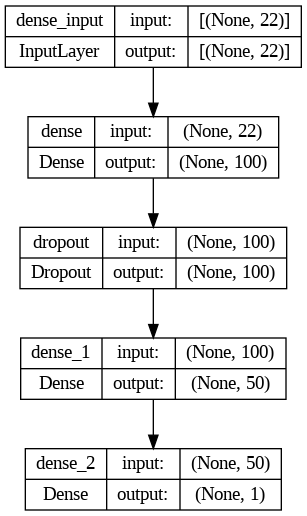

In [27]:
plot_model(model, show_shapes = True)

In [28]:
model.compile(optimizer = Adam(), loss = 'binary_crossentropy', metrics = 'accuracy')

In [29]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 25, batch_size = 128)

Epoch 1/25
810/810 [==============================] - 10s 6ms/step - loss: 0.3031 - accuracy: 0.8750 - val_loss: 0.1857 - val_accuracy: 0.9257
Epoch 2/25
810/810 [==============================] - 4s 5ms/step - loss: 0.1904 - accuracy: 0.9230 - val_loss: 0.1565 - val_accuracy: 0.9371
Epoch 3/25
810/810 [==============================] - 3s 4ms/step - loss: 0.1654 - accuracy: 0.9326 - val_loss: 0.1425 - val_accuracy: 0.9437
Epoch 4/25
810/810 [==============================] - 3s 4ms/step - loss: 0.1516 - accuracy: 0.9373 - val_loss: 0.1302 - val_accuracy: 0.9468
Epoch 5/25
810/810 [==============================] - 4s 5ms/step - loss: 0.1445 - accuracy: 0.9406 - val_loss: 0.1246 - val_accuracy: 0.9485
Epoch 6/25
810/810 [==============================] - 4s 5ms/step - loss: 0.1372 - accuracy: 0.9432 - val_loss: 0.1180 - val_accuracy: 0.9510
Epoch 7/25
810/810 [==============================] - 3s 4ms/step - loss: 0.1322 - accuracy: 0.9447 - val_loss: 0.1167 - val_accuracy: 0.9524
Epoch

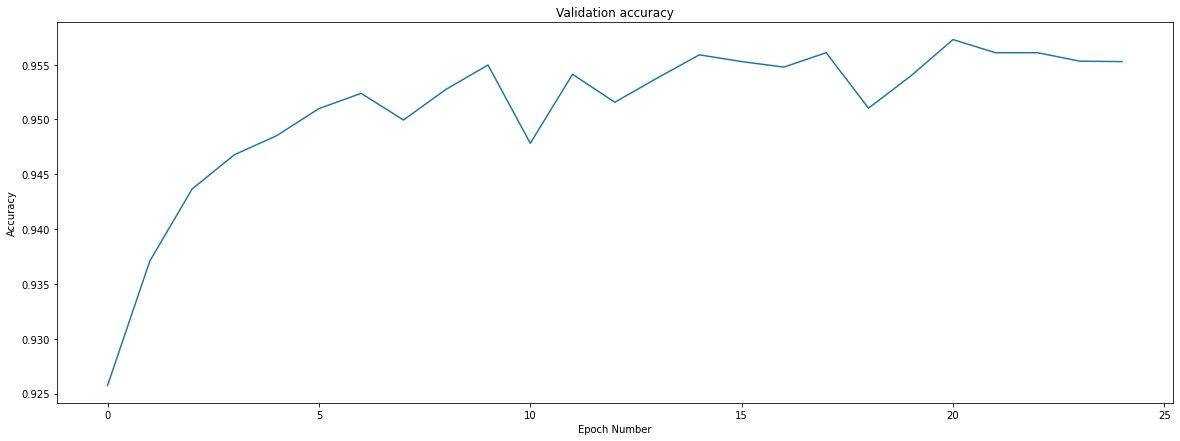

In [30]:
plt.figure(figsize=(20, 7))
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.show()

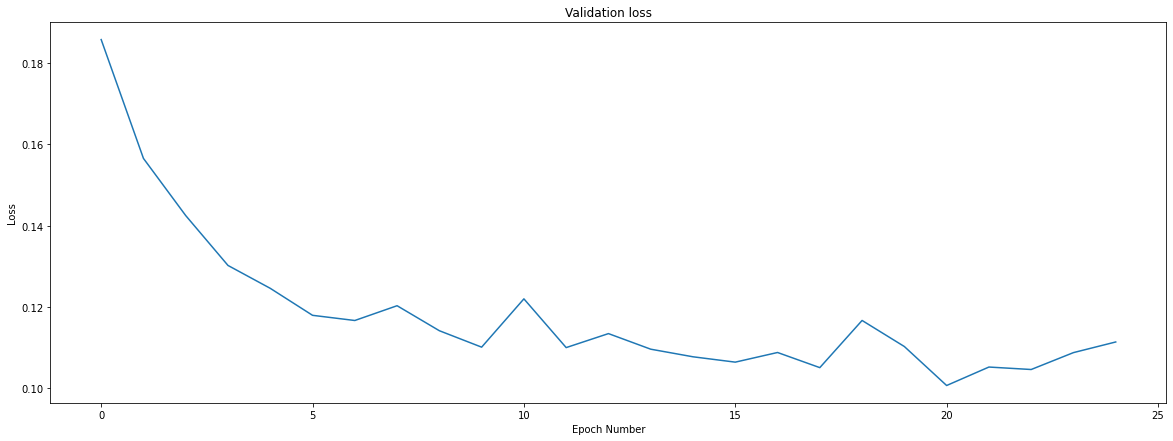

In [34]:
plt.figure(figsize=(20, 7))
plt.plot(history.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch Number')
plt.show()

# Model Evaluation

In [35]:
y_pred = pd.Series(model.predict(X_test).flatten())
y_pred = (y_pred > 0.5).astype(int)

810/810 [==============================] - 1s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14528
           1       0.97      0.93      0.95     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.95      0.96     25893
weighted avg       0.96      0.96      0.96     25893



In [36]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy: ', test_accuracy)
print('Test loss: ',test_loss)

810/810 [==============================] - 2s 2ms/step - loss: 0.1114 - accuracy: 0.9553
Test Accuracy:  0.9552775025367737
Test loss:  0.1114175096154213
